In [1]:
import scipy
import itertools
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Teorema central del límite

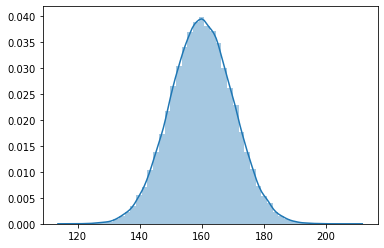

In [6]:
sns.distplot(stats.norm(160, 10).rvs(100000))

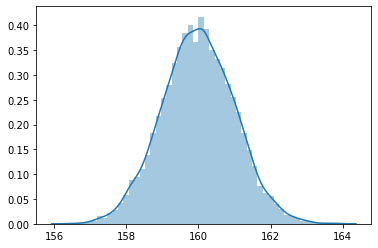

In [15]:
sns.distplot([stats.norm(160, 10).rvs(100).mean() for _ in range(10000)])

## Sample statistics

In [76]:
sample = stats.norm(160, 10).rvs(1000)

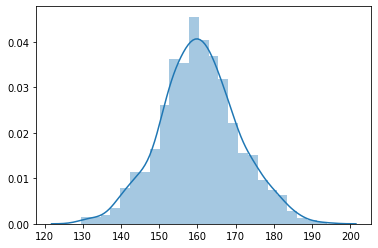

In [77]:
sns.distplot(sample)

In [78]:
n = len(sample)

In [79]:
m = sample.mean()

In [80]:
s = sample.std()

In [81]:
s2 = sample.std() ** 2

In [82]:
se = s/np.sqrt(n)

In [106]:
cv = stats.norm(0, 1).ppf(0.975)

In [107]:
ci = (m - se * cv, m + se * cv )

In [108]:
ci

(159.7669999342967, 161.03375662833858)

## Real data

In [109]:
df = sns.load_dataset('penguins')

In [110]:
df.dropna(inplace=True)

In [112]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


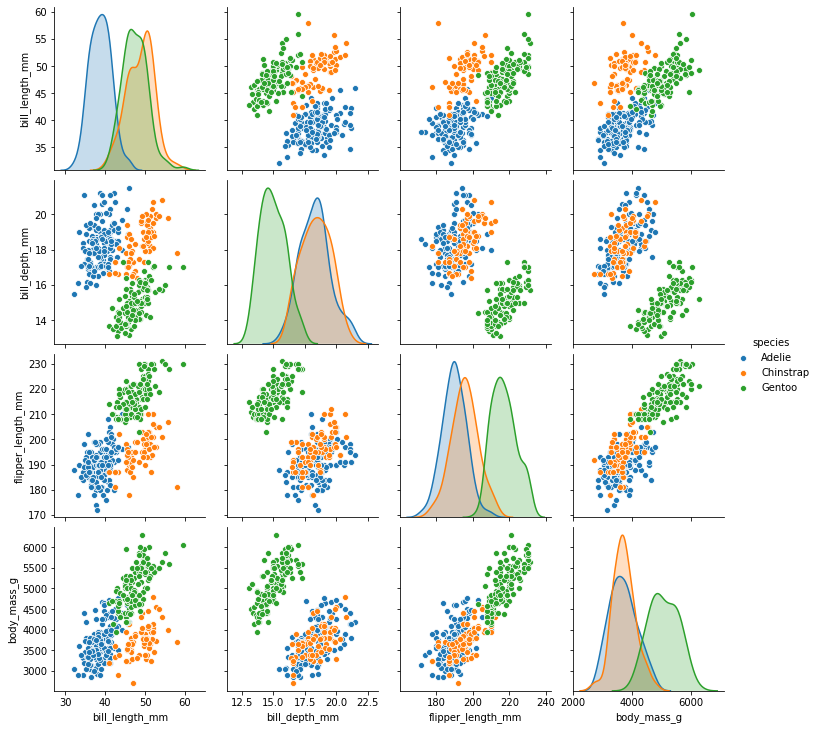

In [118]:
sns.pairplot(df, hue='species')

In [120]:
sample = df[df.species=='Chinstrap']['body_mass_g']

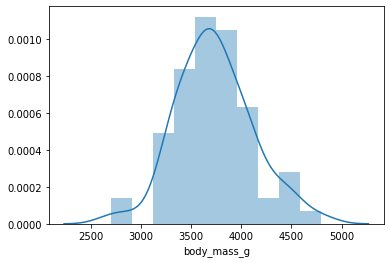

In [122]:
sns.distplot(sample)

In [126]:
n = len(sample)

In [127]:
m = np.mean(sample)

In [128]:
s = np.std(sample)

In [129]:
cv = stats.norm(0,1).ppf(0.975)

In [130]:
se = s / np.sqrt(n)

In [131]:
ci = (m - se*cv, m+se*cv)

In [138]:
print(f'Media: {round(m)}, ci: {ci} (95%)')

Media: 3733.0, ci: (3642.4134350459008, 3823.7630355423344) (95%)


## Testing normality

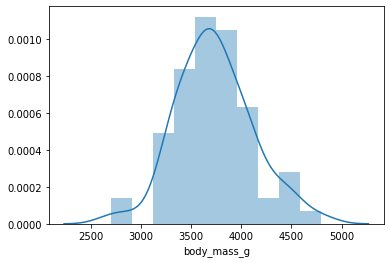

In [137]:
sns.distplot(df[df.species=='Chinstrap']['body_mass_g'])

In [142]:
sample.skew()

0.2474331287920131

In [143]:
sample.kurtosis()

0.5933788890102161

In [147]:
sample = stats.norm(10,1).rvs(10000)

In [149]:
stats.skew(sample)

0.02018064815330491

In [155]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

In [191]:
help(stats.probplot)

Help on function probplot in module scipy.stats.morestats:

probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)
    Calculate quantiles for a probability plot, and optionally show the plot.
    
    Generates a probability plot of sample data against the quantiles of a
    specified theoretical distribution (the normal distribution by default).
    `probplot` optionally calculates a best-fit line for the data and plots the
    results using Matplotlib or a given plot function.
    
    Parameters
    ----------
    x : array_like
        Sample/response data from which `probplot` creates the plot.
    sparams : tuple, optional
        Distribution-specific shape parameters (shape parameters plus location
        and scale).
    dist : str or stats.distributions instance, optional
        Distribution or distribution function name. The default is 'norm' for a
        normal probability plot.  Objects that look enough like a
        stats.distributions instance (i.e. 

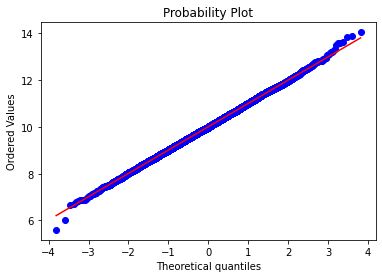

In [196]:
dat, reg = stats.probplot(sample, dist="norm", plot=plt)

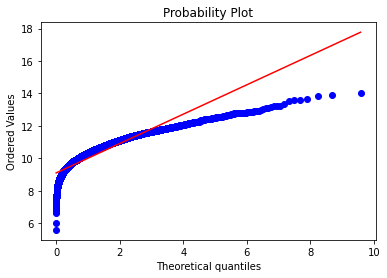

In [192]:
dat, reg = stats.probplot(sample, dist='expon', plot=plt)

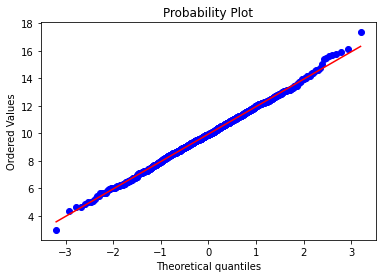

In [184]:
measurements = stats.norm(10,2).rvs(1000) 
dat, reg = stats.probplot(measurements, dist="norm", plot=plt)

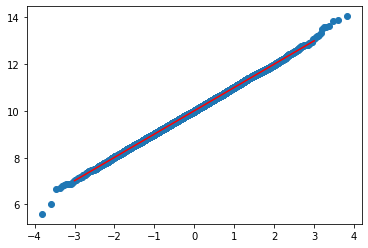

In [197]:
plt.scatter(dat[0], dat[1])
x = np.linspace(-3,3, 100)
y = reg[0] * x + reg[1]
plt.plot(x,y, c='red')

In [186]:
reg

(1.995077126232659, 9.952671597960476, 0.9992464023269232)

In [198]:
sample= df[df.species=='Adelie']['flipper_length_mm']

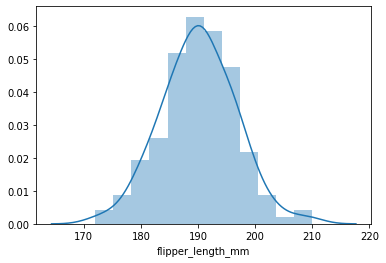

In [200]:
sns.distplot(sample)

In [201]:
sample.skew()

0.0804069791324904

In [202]:
sample.kurtosis()

0.381494607455644

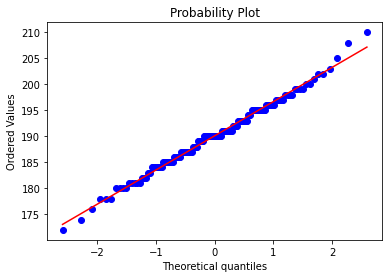

In [203]:
dat, reg = stats.probplot(sample, dist="norm", plot=plt)

In [204]:
reg

(6.568230073392523, 190.1027397260274, 0.9958550470188237)

In [212]:
r, pval = stats.pearsonr(dat[0], dat[1])

In [213]:
r, pval

(0.9958550470188241, 7.843022503155849e-152)

In [215]:
stat, p = scipy.stats.shapiro(sample)
stat, p

(0.9934051632881165, 0.7427687644958496)

In [218]:
stat, p = scipy.stats.shapiro(stats.norm(0,1).rvs(1000))
stat, p

(0.9992867112159729, 0.9760518670082092)

In [217]:
stat, p = scipy.stats.shapiro(stats.expon(0,1).rvs(1000))
stat, p

(0.8458532691001892, 4.428051484519292e-30)

In [220]:
stat, p = scipy.stats.normaltest(stats.norm(0,1).rvs(1000))
stat, p

(0.3712404814116624, 0.8305889589737434)

In [221]:
stat, p = scipy.stats.normaltest(stats.expon(0,1).rvs(1000))
stat, p

(400.41304507947876, 1.1256724053381333e-87)

In [223]:
 scipy.stats.anderson(stats.norm(0,1).rvs(1000), dist='norm')

AndersonResult(statistic=0.2163004232277217, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [224]:
 scipy.stats.anderson(stats.norm(0,1).rvs(1000), dist='expon')

AndersonResult(statistic=inf, critical_values=array([0.921, 1.077, 1.34 , 1.605, 1.956]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [225]:
 scipy.stats.anderson(stats.expon(0,1).rvs(1000), dist='expon')

AndersonResult(statistic=1.0917506220466748, critical_values=array([0.921, 1.077, 1.34 , 1.605, 1.956]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [229]:
stat, p = stats.kstest(stats.norm(0,1).rvs(1000), 'norm', args=(0, 1))
stat, p 

(0.02172488295639785, 0.7327518401169035)

In [235]:
stat, p = stats.kstest(stats.expon(0,3).rvs(1000), 'expon', args=(0, 3))
stat, p 

(0.02067898371298399, 0.7859056895214134)

## Distribution fitting

In [239]:
x = stats.norm(0,1).rvs(1000)

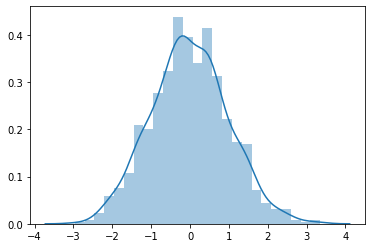

In [240]:
sns.distplot(x)

In [241]:
stats.norm.fit(x)

(-0.010134142319380065, 0.9874115938060813)

In [250]:
data.mean()

-0.013634207076002944

In [249]:
data.std()

0.9918346590520398

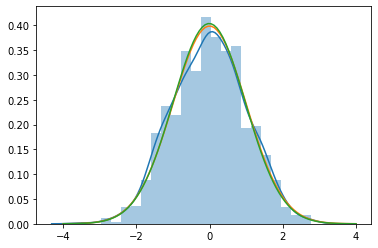

In [246]:
x = np.linspace(-4,4,100)
data = stats.norm(0,1).rvs(1000)
sns.distplot(data)
plt.plot(x, stats.norm(0,1).pdf(x))
plt.plot(x, stats.norm(-0.010134142319380065, 0.9874115938060813).pdf(x))

In [251]:
sample = df[df.species=='Adelie']['flipper_length_mm']

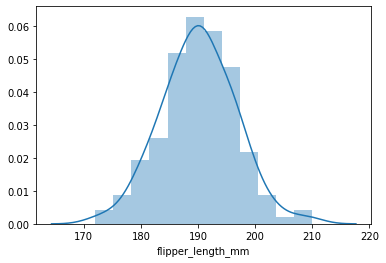

In [253]:
sns.distplot(sample)

In [254]:
stats.norm.fit(sample)

(190.1027397260274, 6.499451454255972)

In [255]:
stats.gamma.fit(sample)

(808.3518823045479, 5.322038524310809, 0.22858804464565052)